In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=Warning)

##  Read data

In [2]:
pd_data = pd.read_csv('./NYC_current_job_postings/nyc-jobs.csv')
pd_data.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-06-11T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-06-11T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-06-11T00:00:00.000
3,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-06-11T00:00:00.000
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,NaN,2014-01-08T00:00:00.000,2019-06-11T00:00:00.000


### see data information

In [3]:
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 28 columns):
Job ID                           3159 non-null int64
Agency                           3159 non-null object
Posting Type                     3159 non-null object
# Of Positions                   3159 non-null int64
Business Title                   3159 non-null object
Civil Service Title              3159 non-null object
Title Code No                    3159 non-null object
Level                            3159 non-null object
Job Category                     3157 non-null object
Full-Time/Part-Time indicator    2926 non-null object
Salary Range From                3159 non-null float64
Salary Range To                  3159 non-null float64
Salary Frequency                 3159 non-null object
Work Location                    3159 non-null object
Division/Work Unit               3159 non-null object
Job Description                  3159 non-null object
Minimum Qual Requirements    

## See the distribution of Salary Range From

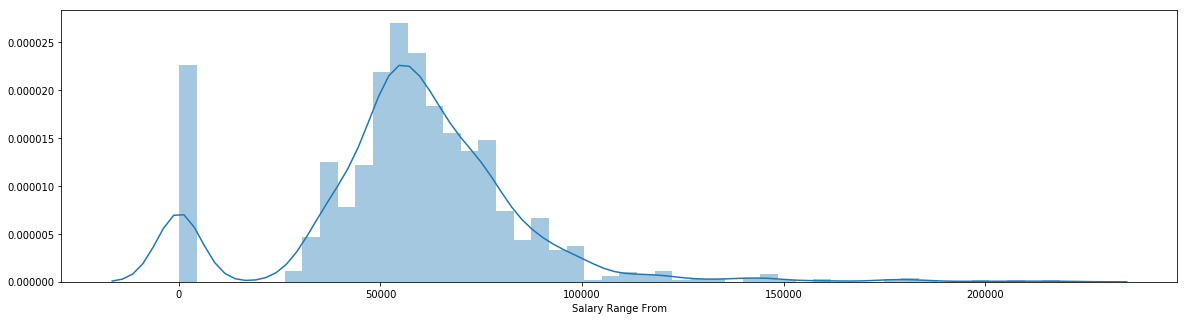

In [4]:
plt.figure(figsize=(20, 5))
sns.distplot(pd_data['Salary Range From'])
plt.show()

In [5]:
print("The average of salary range from is", pd_data['Salary Range From'].mean())
print("The max of salary range from is", pd_data.sort_values(['Salary Range From'], ascending=False, inplace=False).reset_index()['Salary Range From'][0])

The average of salary range from is 57023.451618043684
The max of salary range from is 218587.0


## See the distribution of Salary Range To

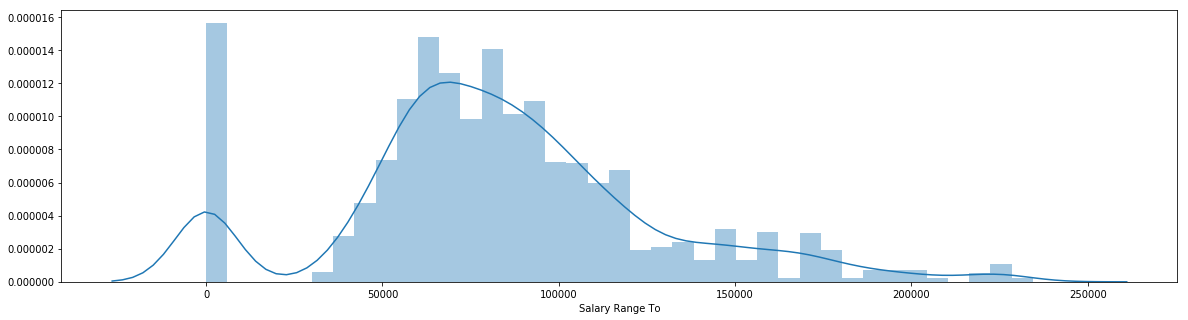

In [6]:
plt.figure(figsize=(20, 5))
sns.distplot(pd_data['Salary Range To'])
plt.show()

In [7]:
print("The average of salary range to is", pd_data['Salary Range To'].mean())
print("The max of salary range to is", pd_data.sort_values(['Salary Range To'], ascending=False, inplace=False).reset_index()['Salary Range To'][0])

The average of salary range to is 83052.81924618549
The max of salary range to is 234402.0


## See which job Category has the highest salary range from

In [8]:
salaryFloor_df = pd_data.groupby(['Job Category'])['Salary Range From'].mean()
salaryFloor_df = salaryFloor_df.reset_index()
salaryFloor_df.sort_values(['Salary Range From'], ascending=False, inplace=True)
salaryFloor_df

,Job Category,Salary Range From
23,"Administration & Human Resources Finance, Acco...",218587.000000
83,"Engineering, Architecture, & Planning Maintena...",198518.000000
81,"Engineering, Architecture, & Planning Finance,...",192292.500000
105,"Health Policy, Research & Analysis Public Safe...",145000.000000
7,Administration & Human Resources Communication...,140000.000000
50,Communications & Intergovernmental Affairs Leg...,112045.000000
99,"Finance, Accounting, & Procurement Technology,...",106192.600000
25,"Administration & Human Resources Finance, Acco...",98624.666667
91,"Finance, Accounting, & Procurement Health Poli...",95522.000000
61,Constituent Services & Community Programs Comm...,94981.000000


In [9]:
print("Max: ", salaryFloor_df['Salary Range From'][23], salaryFloor_df['Job Category'][23])
print("Min: ", salaryFloor_df['Salary Range From'][73], salaryFloor_df['Job Category'][73])

Max:  218587.0 Administration & Human Resources Finance, Accounting, & Procurement Building Operations & Maintenance
Min:  13.5 Constituent Services & Community Programs Policy, Research & Analysis


So if you want to go to NYC, do  Administration & Human Resources Finance, Accounting, & Procurement Building Operations & Maintenance

don't do  Constituent Services & Community Programs Policy, Research & Analysis

## See which job Category has the highest & lowest salary range to 

In [10]:
salaryCeiling_df = pd_data.groupby(['Job Category'])['Salary Range To'].mean()
salaryCeiling_df = salaryCeiling_df.reset_index()
salaryCeiling_df.sort_values(['Salary Range To'], ascending=False, inplace=True)
salaryCeiling_df

,Job Category,Salary Range To
61,Constituent Services & Community Programs Comm...,225217.000000
23,"Administration & Human Resources Finance, Acco...",218587.000000
62,Constituent Services & Community Programs Comm...,202744.000000
81,"Engineering, Architecture, & Planning Finance,...",199792.500000
83,"Engineering, Architecture, & Planning Maintena...",198518.000000
88,"Engineering, Architecture, & Planning Technolo...",186555.000000
105,"Health Policy, Research & Analysis Public Safe...",180000.000000
68,Constituent Services & Community Programs Heal...,165000.000000
7,Administration & Human Resources Communication...,150000.000000
24,"Administration & Human Resources Finance, Acco...",148000.000000


In [11]:
print("Max: ", salaryCeiling_df['Salary Range To'][61], salaryCeiling_df['Job Category'][61], )
print("Min: ", salaryCeiling_df['Salary Range To'][28], salaryCeiling_df['Job Category'][28])

Max:  225217.0 Constituent Services & Community Programs Communications & Intergovernmental Affairs Finance, Accounting, & Procurement Policy, Research & Analysis Social Services
Min:  16.0 Administration & Human Resources Finance, Accounting, & Procurement Technology, Data & Innovation


So if you want to go to NYC, do  Constituent Services & Community Programs Communications & Intergovernmental Affairs Finance, Accounting, & Procurement Policy, Research & Analysis Social Services

don't do Administration & Human Resources Finance, Accounting, & Procurement Technology, Data & Innovation

## Heat map

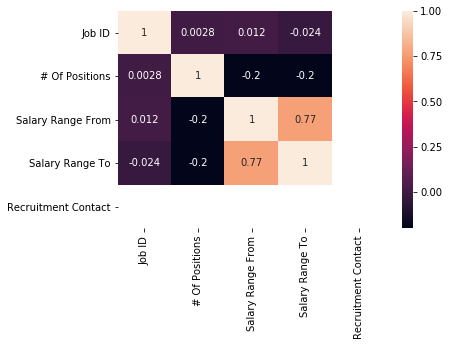

In [12]:
correlation = pd_data.corr()
sns.heatmap(correlation, annot=True, cbar=True)